In [ ]:
!pip install pandas matplotlib prophet

In [10]:
import pandas as pd

df = pd.read_csv('./dataset.csv', index_col=False)
df.columns

Index(['datetime', 'nat_demand', 'T2M_toc', 'QV2M_toc', 'TQL_toc', 'W2M_toc',
       'T2M_san', 'QV2M_san', 'TQL_san', 'W2M_san', 'T2M_dav', 'QV2M_dav',
       'TQL_dav', 'W2M_dav', 'Holiday_ID', 'holiday', 'school'],
      dtype='object')

## 결측치 확인

In [ ]:
# 1️⃣ 전체 컬럼별 결측치 개수 확인
print(df.isnull().sum())
# 2️⃣ 결측치가 있는 컬럼만 보기
print(df.isnull().sum()[df.isnull().sum() > 0])
# 3️⃣ 데이터프레임 전체 결측치 합계
print('전체 결측치 합계:', df.isnull().sum().sum())

## 시, 일, 월 단위로 편집

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)
print(f'관측일 : {min(df.index)} ~ {max(df.index)}')

hourly_df = df.resample('H').mean()
daily_df = df.resample('D').mean()
monthly_df = df.resample('M').mean()

## 자기회귀 시프팅

In [66]:
# Hourly
hourly_df['nat_demand_t-1'] = hourly_df['nat_demand'].shift(1)
hourly_df['nat_demand_t-24'] = hourly_df['nat_demand'].shift(24)

# Daily
daily_df['nat_demand_t-1'] = daily_df['nat_demand'].shift(1)
daily_df['nat_demand_t-7'] = daily_df['nat_demand'].shift(7)   # 일주일 전

# Weekly
weekly_df = df.resample('W').mean()
weekly_df['nat_demand_t-1'] = weekly_df['nat_demand'].shift(1)
weekly_df['nat_demand_t-4'] = weekly_df['nat_demand'].shift(4)  # 4주 전 (약 한달 전)

# 결측치 제거
hourly_df.dropna(inplace=True)
daily_df.dropna(inplace=True)
monthly_df.dropna(inplace=True)
weekly_df.dropna(inplace=True)


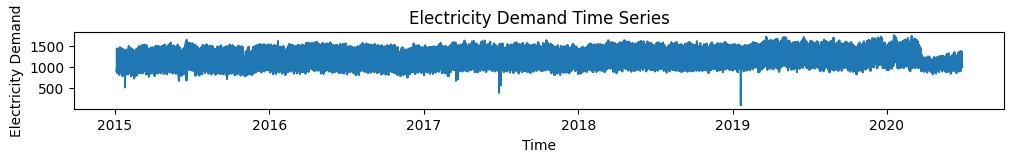

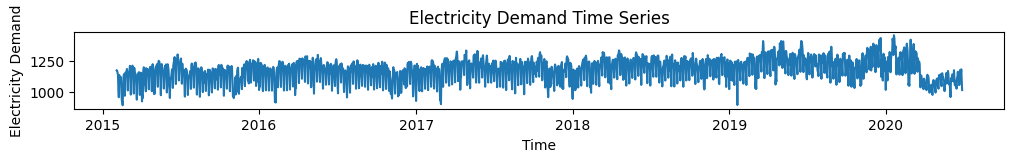

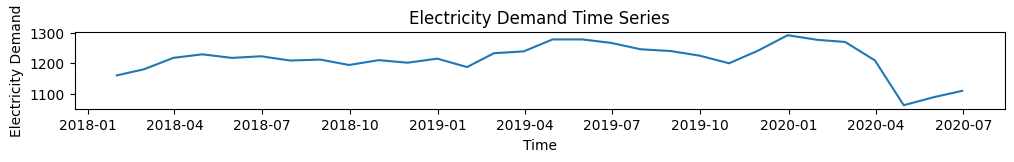

In [46]:
import matplotlib.pyplot as plt

for data in [hourly_df, daily_df, monthly_df]:
    plt.figure(figsize=(12,1))
    plt.plot(data['nat_demand'])
    plt.title('Electricity Demand Time Series')
    plt.xlabel('Time')
    plt.ylabel('Electricity Demand')
    plt.show()

10:38:53 - cmdstanpy - INFO - Chain [1] start processing
10:39:35 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/63 [00:00<?, ?it/s]10:39:43 - cmdstanpy - INFO - Chain [1] start processing
10:39:44 - cmdstanpy - INFO - Chain [1] done processing
  2%|▏         | 1/63 [00:00<00:56,  1.10it/s]10:39:44 - cmdstanpy - INFO - Chain [1] start processing
10:39:45 - cmdstanpy - INFO - Chain [1] done processing
  3%|▎         | 2/63 [00:02<01:06,  1.09s/it]10:39:45 - cmdstanpy - INFO - Chain [1] start processing
10:39:46 - cmdstanpy - INFO - Chain [1] done processing
  5%|▍         | 3/63 [00:03<01:15,  1.25s/it]10:39:47 - cmdstanpy - INFO - Chain [1] start processing
10:39:48 - cmdstanpy - INFO - Chain [1] done processing
  6%|▋         | 4/63 [00:05<01:29,  1.52s/it]10:39:49 - cmdstanpy - INFO - Chain [1] start processing
10:39:51 - cmdstanpy - INFO - Chain [1] done process

Frequency: H
          horizon          mse       rmse        mae      mape     mdape  \
0 3 days 00:00:00  8154.978900  90.304922  68.177359  0.059790  0.043787   
1 3 days 01:00:00  8230.583732  90.722565  68.370528  0.059993  0.043688   
2 3 days 02:00:00  8302.098113  91.115850  68.549141  0.060187  0.043711   
3 3 days 03:00:00  8384.148135  91.564994  68.758454  0.060418  0.043754   
4 3 days 04:00:00  8464.913243  92.004963  68.961764  0.060649  0.043659   

      smape  coverage  
0  0.059418  0.751323  
1  0.059646  0.751543  
2  0.059864  0.751102  
3  0.060119  0.750441  
4  0.060377  0.750220  


10:51:21 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/53 [00:00<?, ?it/s]10:51:22 - cmdstanpy - INFO - Chain [1] start processing
10:51:22 - cmdstanpy - INFO - Chain [1] done processing
  2%|▏         | 1/53 [00:00<00:06,  7.73it/s]10:51:22 - cmdstanpy - INFO - Chain [1] start processing
10:51:22 - cmdstanpy - INFO - Chain [1] done processing
  4%|▍         | 2/53 [00:00<00:06,  7.60it/s]10:51:22 - cmdstanpy - INFO - Chain [1] start processing
10:51:22 - cmdstanpy - INFO - Chain [1] done processing
  6%|▌         | 3/53 [00:00<00:06,  7.35it/s]10:51:22 - cmdstanpy - INFO - Chain [1] start processing
10:51:22 - cmdstanpy - INFO - Chain [1] done processing
  8%|▊         | 4/53 [00:00<00:06,  7.15it/s]10:51:22 - cmdstanpy - INFO - Chain [1] start processing
10:51:23 - cmdstanpy - INFO - Chain [1] done processing
  9%|▉         | 5/53 [00:00<00:07,  6.67it/s]10:51:2

Frequency: D
  horizon          mse       rmse        mae      mape     mdape     smape  \
0  3 days  3038.453891  55.122172  38.735868  0.032843  0.021750  0.032378   
1  4 days  3315.597876  57.581229  39.971662  0.034054  0.021877  0.033445   
2  5 days  3466.580505  58.877674  41.505137  0.035575  0.027116  0.034972   
3  6 days  3334.641372  57.746354  42.563095  0.036616  0.028011  0.035933   
4  7 days  3130.389011  55.949879  40.695166  0.035099  0.027647  0.034535   

   coverage  
0  0.767296  
1  0.742138  
2  0.704403  
3  0.679245  
4  0.723270  


Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/19 [00:00<?, ?it/s]10:51:39 - cmdstanpy - INFO - Chain [1] start processing
10:51:40 - cmdstanpy - INFO - Chain [1] done processing
  5%|▌         | 1/19 [00:00<00:06,  2.95it/s]10:51:40 - cmdstanpy - INFO - Chain [1] start processing
10:51:40 - cmdstanpy - INFO - Chain [1] done processing
 11%|█         | 2/19 [00:00<00:07,  2.41it/s]10:51:40 - cmdstanpy - INFO - Chain [1] start processing
10:51:41 - cmdstanpy - INFO - Chain [1] done processing
 16%|█▌        | 3/19 [00:01<00:06,  2.37it/s]10:51:41 - cmdstanpy - INFO - Chain [1] start processing
10:51:41 - cmdstanpy - INFO - Chain [1] done processing
 21%|██        | 4/19 [00:01<00:07,  2.14it/s]10:51:41 - cmdstanpy - INFO - Chain [1] start processing
10:51:41 - cmdstanpy - INFO - Chain [1] done processing
10:51:41 - cmdstanpy - INFO - Chain [1] start processing
10:51:41 - cmdstanpy - INFO - Chain [1] done process

Frequency: W-SUN
  horizon          mse       rmse        mae      mape     mdape     smape  \
0 14 days  5437.091040  73.736633  43.352652  0.037810  0.017332  0.036555   
1 21 days  4871.119806  69.793408  42.202292  0.037136  0.019854  0.035760   
2 28 days  4741.861202  68.861173  46.570633  0.040161  0.025661  0.039294   
3 35 days  3997.777382  63.227979  42.903814  0.036539  0.019858  0.036178   
4 42 days  3745.275626  61.198657  44.787700  0.037785  0.027124  0.037274   

   coverage  
0  0.624402  
1  0.677033  
2  0.593301  
3  0.624402  
4  0.586124  


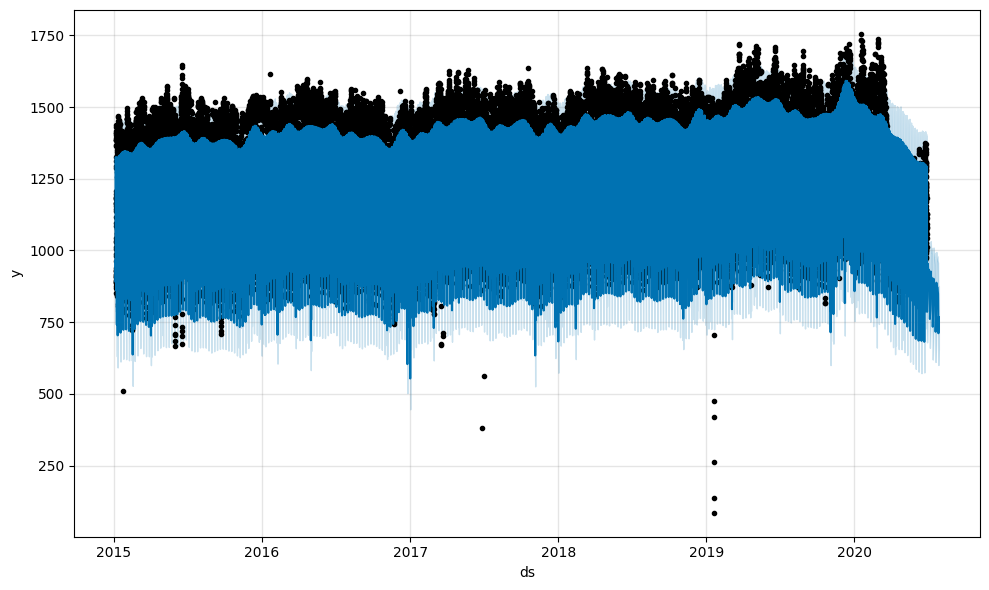

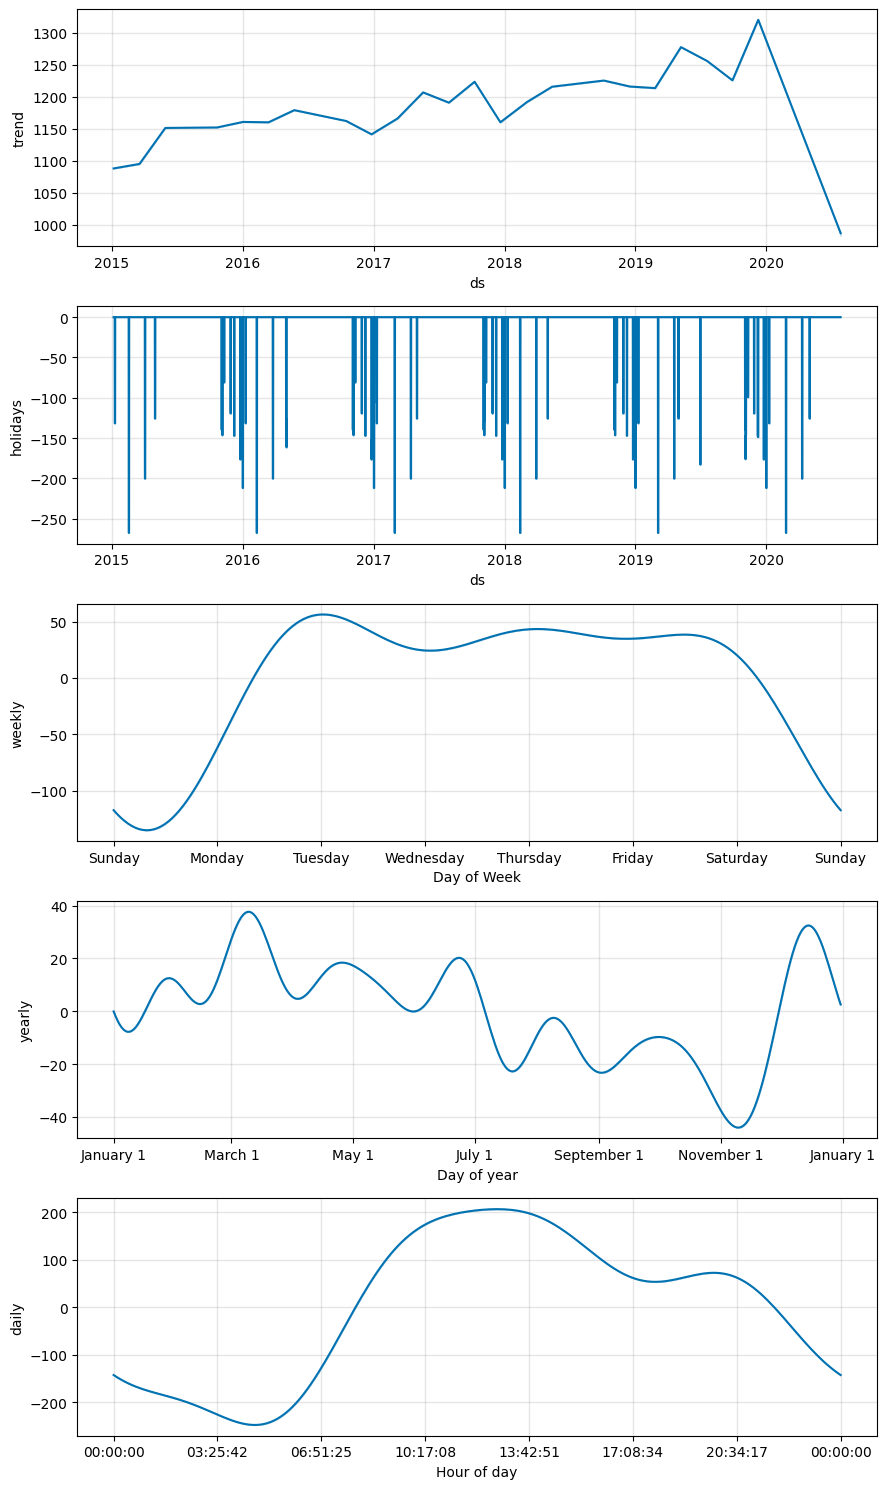

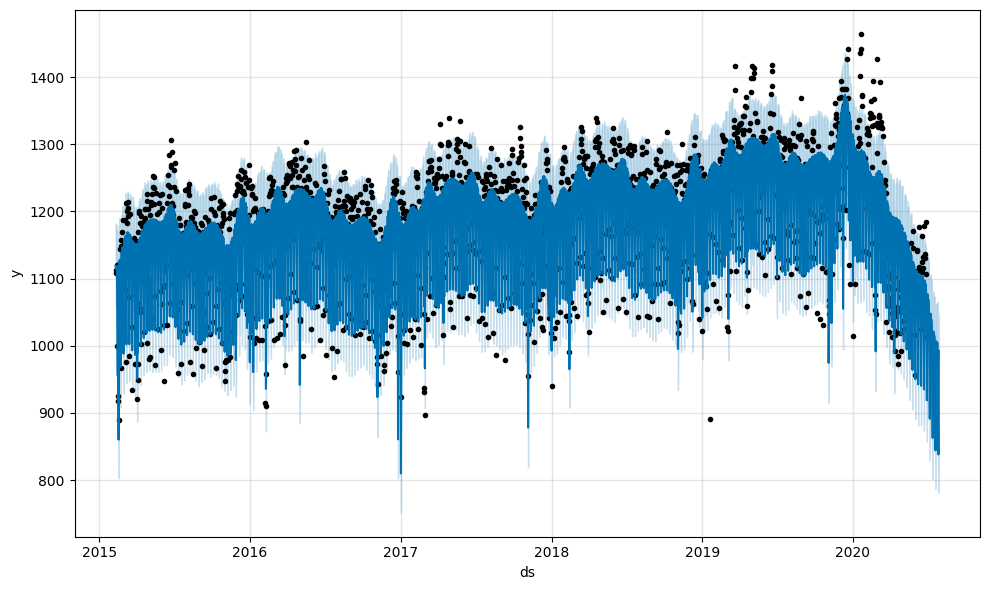

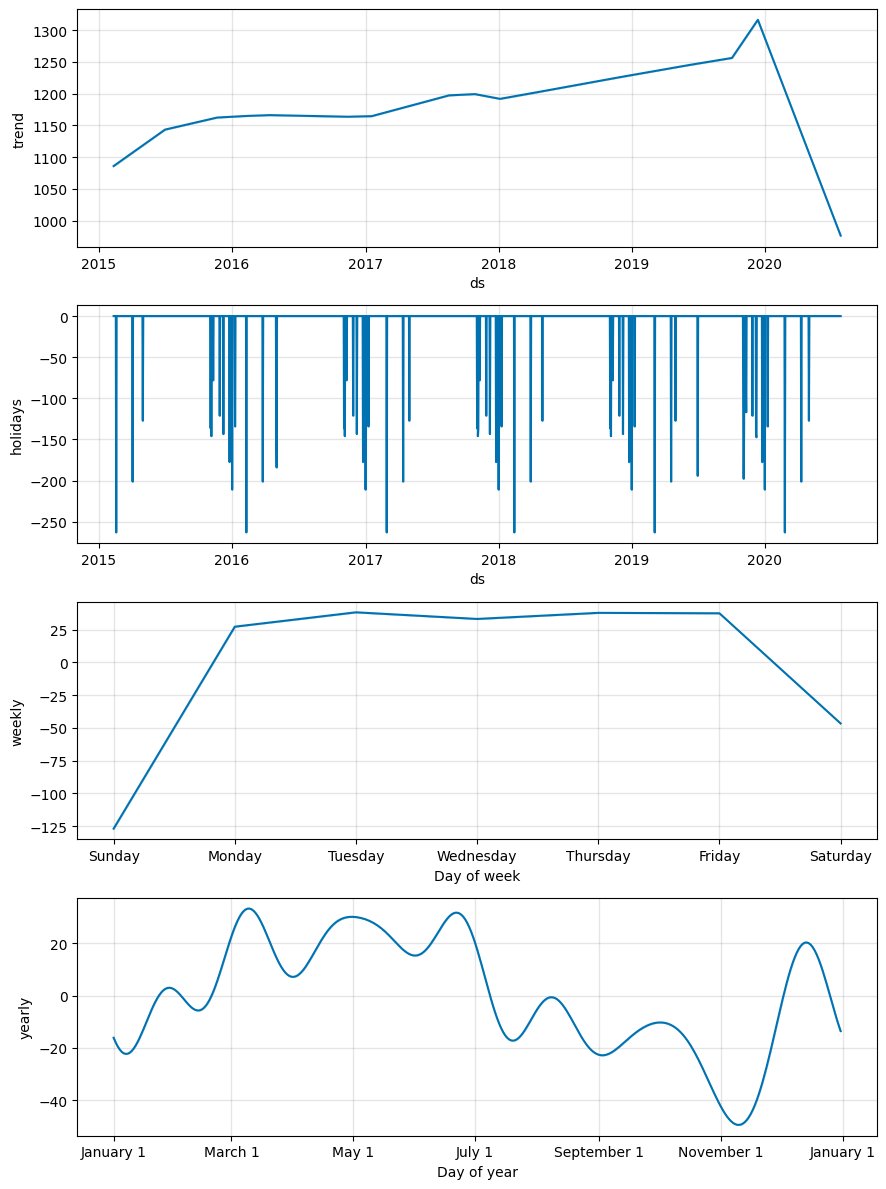

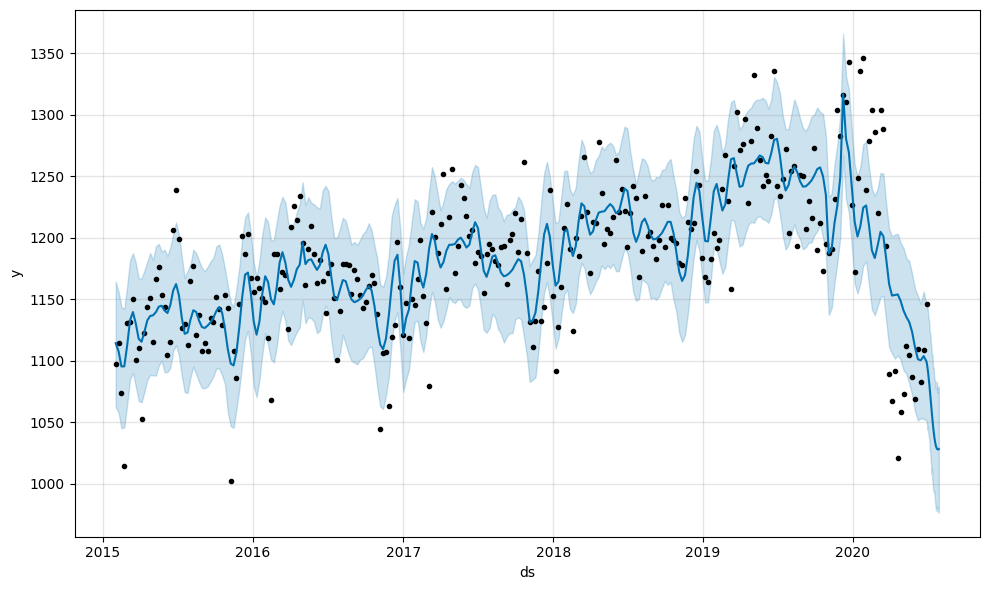

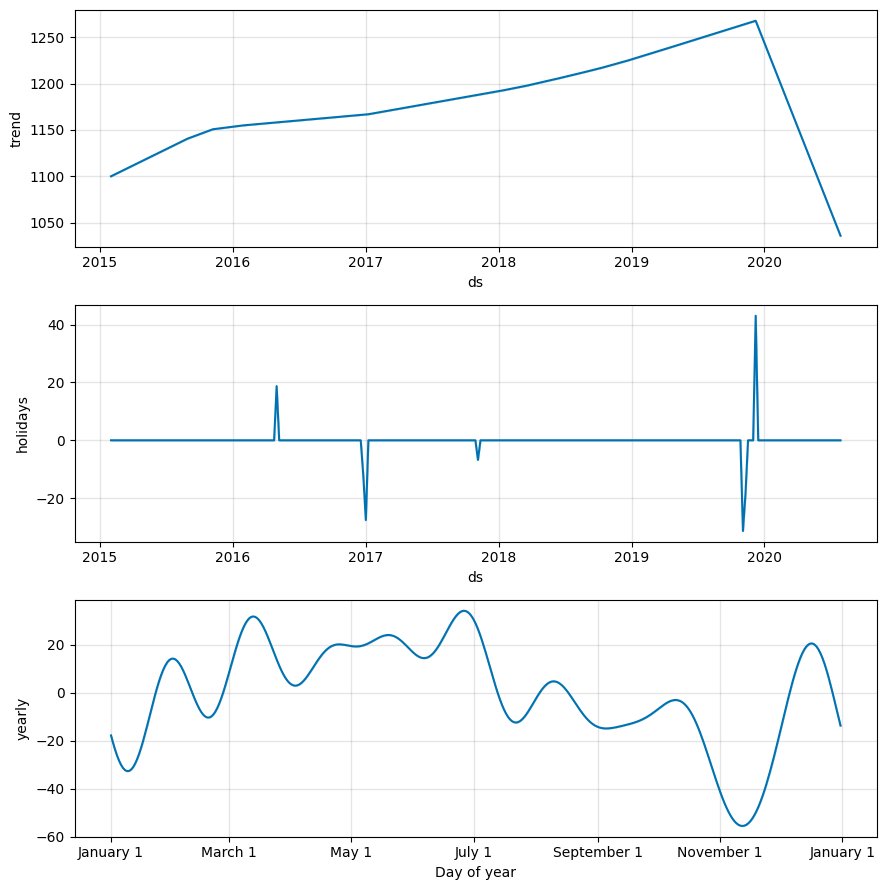

In [70]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics

models = []
df_ps = []

# 시, 일, 주 데이터프레임만 처리
for data in [hourly_df, daily_df, weekly_df]:
    # Prophet 데이터 준비
    prophet_df = data.reset_index()[['datetime', 'nat_demand']]
    prophet_df.columns = ['ds', 'y']

    # 데이터 빈도 추정
    freq = pd.infer_freq(prophet_df['ds'])
    freq = freq.upper() if freq else ''

    # Prophet 모델 옵션
    model = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=('H' in freq or 'D' in freq),    # Hourly, Daily만 주간 seasonality
        daily_seasonality=('H' in freq),                    # Hourly만 일간 seasonality
        changepoint_range=0.9,                              # 변곡점 탐색 범위 (0~1)
        changepoint_prior_scale=0.1,                        # 변곡점 민감도 (0.05~0.5)
        holidays_prior_scale=10,                            # 공휴일 효과 민감도
        seasonality_prior_scale=10                          # 시즌성 민감도
    )
    model.add_country_holidays(country_name='PA')
    model.fit(prophet_df)
    models.append(model)
    
    # 예측 데이터 생성
    future = model.make_future_dataframe(periods=30)
    forecast = model.predict(future)
    # 전체 예측 plot
    fig1 = model.plot(forecast)
    # 트렌드, 시즌성, 공휴일 효과 plot
    fig2 = model.plot_components(forecast)

    # Horizon, Initial, Period 설정
    if 'H' in freq:
        horizon = '720 hours'       # 30일
        initial = '2160 hours'      # 90일 학습
        period = '720 hours'        # 30일 간격
    elif 'D' in freq:
        horizon = '30 days'         # 30일
        initial = '365 days'        # 1년 학습
        period = '30 days'          # 30일 간격
    elif 'W' in freq:
        horizon = '84 days'        # 3개월
        initial = '364 days'        # 1년 학습
        period = '84 days'         # 3개월 간격
    else:
        raise ValueError(f"Unknown frequency: {freq}")

    # Cross-Validation
    df_cv = cross_validation(
        model,
        initial=initial,
        period=period,
        horizon=horizon
    )
    df_p = performance_metrics(df_cv)
    df_ps.append(df_p)
    
    print(f'Frequency: {freq}')
    print(df_p.head())


In [110]:
# import pickle

# # 모델 저장
# for i, j in zip(["H", "D", "W"], models):
#     with open(f'./model/prophet_model_{i}.pkl', 'wb') as f:
#         pickle.dump(model, f)

# for i, j in zip(["H", "D", "W"], df_ps):
#     j.to_csv(f"./df_ps/df_p_{i}", index=False)

df_ps = []
for i in ["H", "D", "W"]:
    df_p = pd.read_csv(f"./df_ps/df_p_{i}", index_col=False)
    display(df_p.head())
    df_ps.append(df_p)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days 00:00:00,8154.978900,90.304922,68.177359,0.059790,0.043787,0.059418,0.751323
1,3 days 01:00:00,8230.583732,90.722565,68.370528,0.059993,0.043688,0.059646,0.751543
2,3 days 02:00:00,8302.098113,91.115850,68.549141,0.060187,0.043711,0.059864,0.751102
3,3 days 03:00:00,8384.148135,91.564994,68.758454,0.060418,0.043754,0.060119,0.750441
4,3 days 04:00:00,8464.913243,92.004963,68.961764,0.060649,0.043659,0.060377,0.750220


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,3038.453891,55.122172,38.735868,0.032843,0.021750,0.032378,0.767296
1,4 days,3315.597876,57.581229,39.971662,0.034054,0.021877,0.033445,0.742138
2,5 days,3466.580505,58.877674,41.505137,0.035575,0.027116,0.034972,0.704403
3,6 days,3334.641372,57.746354,42.563095,0.036616,0.028011,0.035933,0.679245
4,7 days,3130.389011,55.949879,40.695166,0.035099,0.027647,0.034535,0.723270


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,14 days,5437.091040,73.736633,43.352652,0.037810,0.017332,0.036555,0.624402
1,21 days,4871.119806,69.793408,42.202292,0.037136,0.019854,0.035760,0.677033
2,28 days,4741.861202,68.861173,46.570633,0.040161,0.025661,0.039294,0.593301
3,35 days,3997.777382,63.227979,42.903814,0.036539,0.019858,0.036178,0.624402
4,42 days,3745.275626,61.198657,44.787700,0.037785,0.027124,0.037274,0.586124


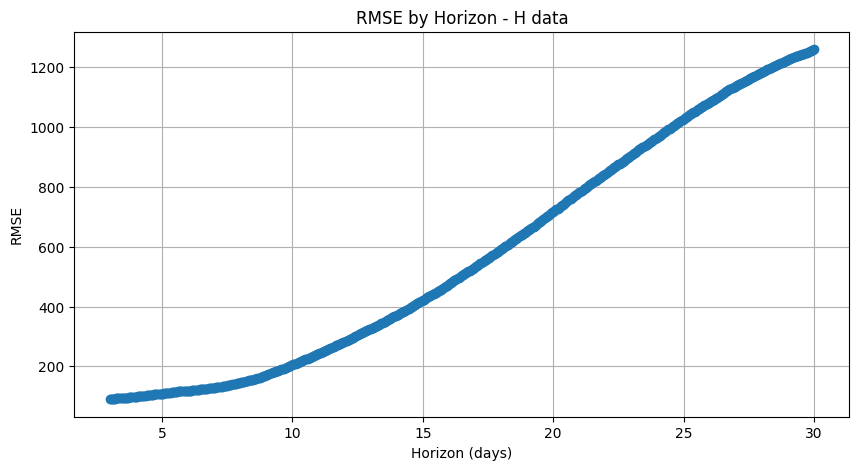

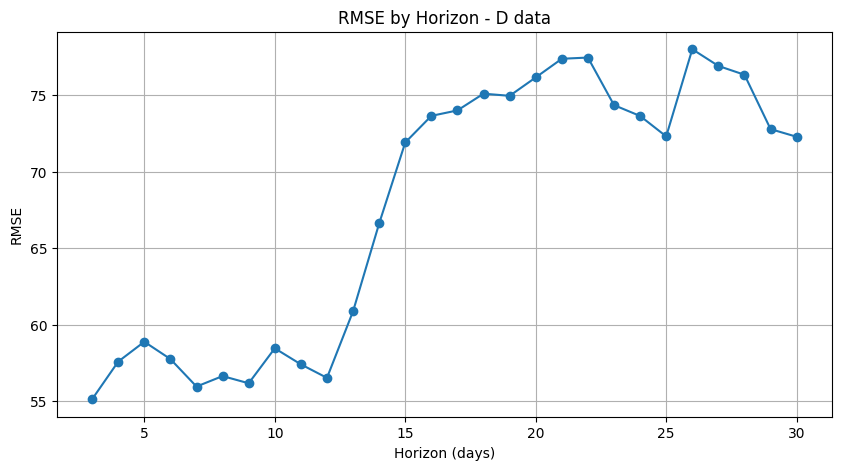

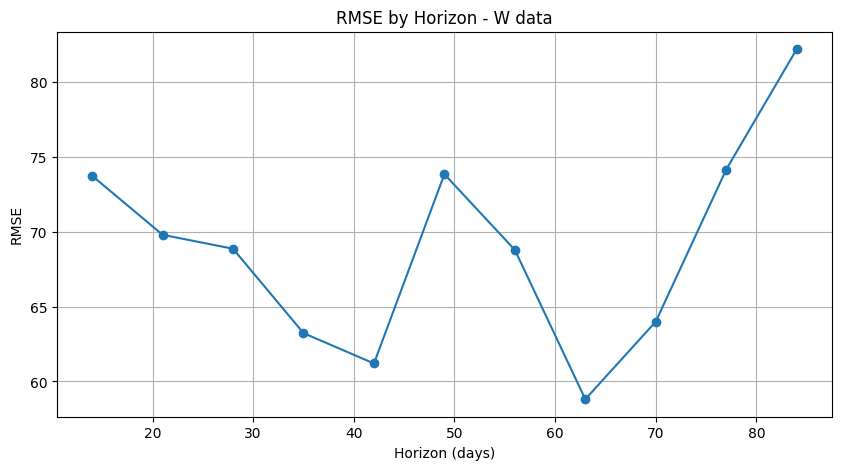

In [ ]:

    
for i, j in zip(["H", "D", "W"], df_ps):
    # Horizon 컬럼을 Timedelta로 변환
    j['horizon'] = pd.to_timedelta(j['horizon'])

    # Hourly 데이터면 hours → days로 변환
    if i == 'H':
        j['horizon'] = j['horizon'].dt.total_seconds() / 3600 / 24
    else:
        j['horizon'] = j['horizon'].dt.days

    df_rmse = j.groupby('horizon')['rmse'].mean()

    plt.figure(figsize=(10,5))
    plt.plot(df_rmse.index, df_rmse.values, marker='o')
    plt.xlabel('Horizon (days)')
    plt.ylabel('RMSE')
    plt.title(f'RMSE by Horizon - {i} data')
    plt.grid()
    plt.show()


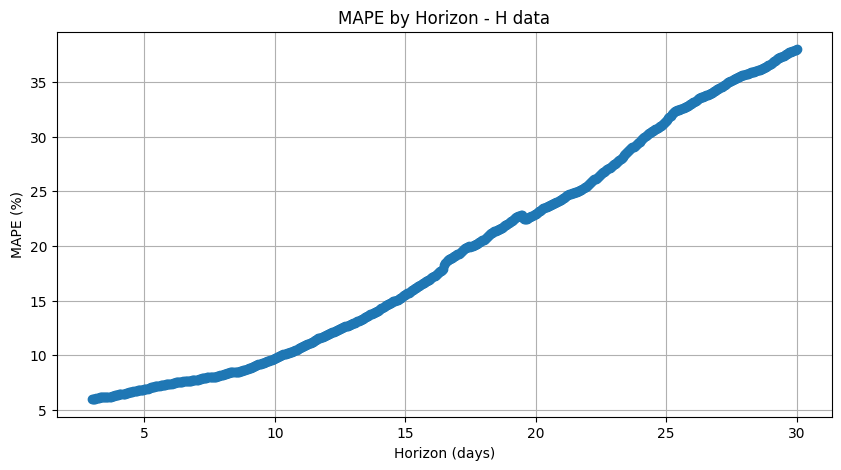

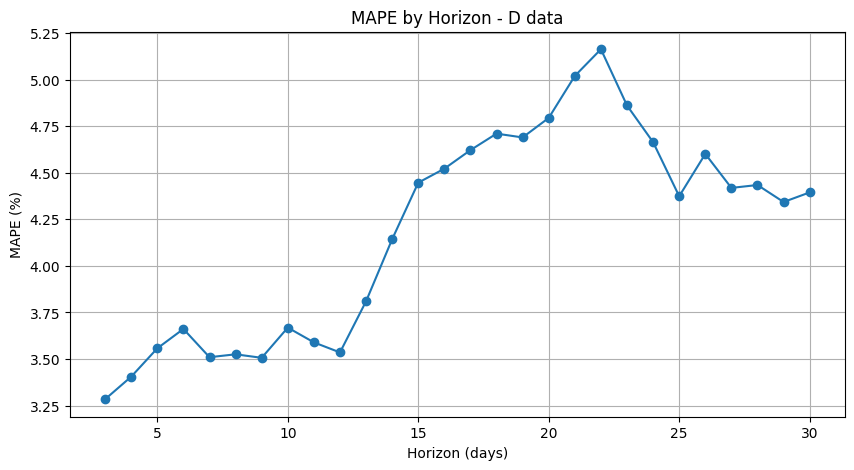

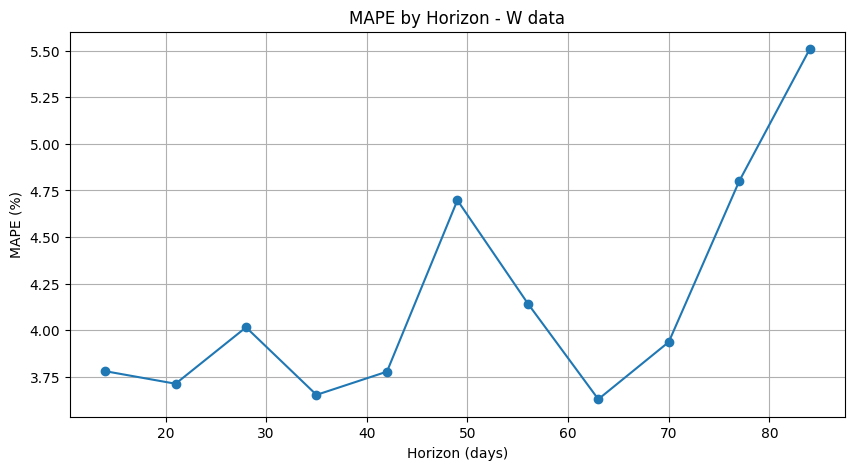

In [109]:
df_ps = []
for i in ["H", "D", "W"]:
    df_ps.append(pd.read_csv(f"./df_ps/df_p_{i}", index_col=False))
    
for i, j in zip(["H", "D", "W"], df_ps):
    # Horizon 컬럼을 Timedelta로 변환
    j['horizon'] = pd.to_timedelta(j['horizon'])

    # Hourly 데이터면 hours → days로 변환
    if i == 'H':
        j['horizon'] = j['horizon'].dt.total_seconds() / 3600 / 24
    else:
        j['horizon'] = j['horizon'].dt.days

    # horizon별 평균 MAPE 계산
    df_mape = j.groupby('horizon')['mape'].mean() * 100  # 퍼센트로 변환

    plt.figure(figsize=(10,5))
    plt.plot(df_mape.index, df_mape.values, marker='o')
    plt.xlabel('Horizon (days)')
    plt.ylabel('MAPE (%)')
    plt.title(f'MAPE by Horizon - {i} data')
    plt.grid()
    plt.show()
